In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.datasets
from scipy import signal

c:\Users\georg\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Images in Python

### Sample Image

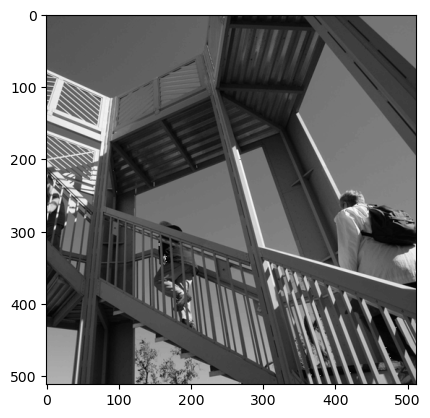

In [3]:
ascent = scipy.datasets.ascent()
plt.gray()
plt.imshow(ascent)
plt.show()

Text(0, 0.5, 'Number of Pixels')

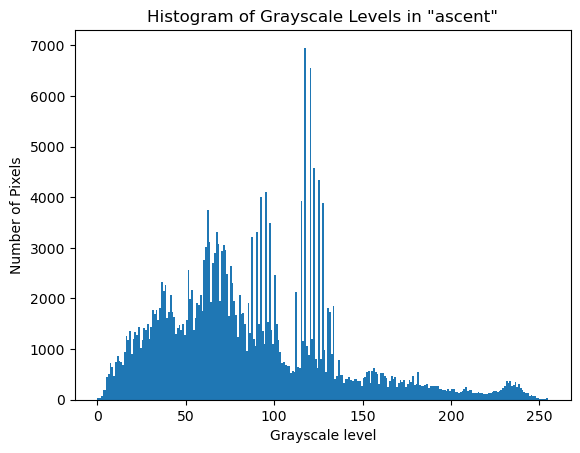

In [4]:
ascent1D = ascent.ravel()
plt.hist(ascent1D, bins = 255)
plt.title('Histogram of Grayscale Levels in "ascent"')
plt.xlabel('Grayscale level')
plt.ylabel('Number of Pixels')

## Applying Brightness/Contrast Changes to 'ascent'

Increased Brightness

Text(0, 0.5, 'Number of Pixels')

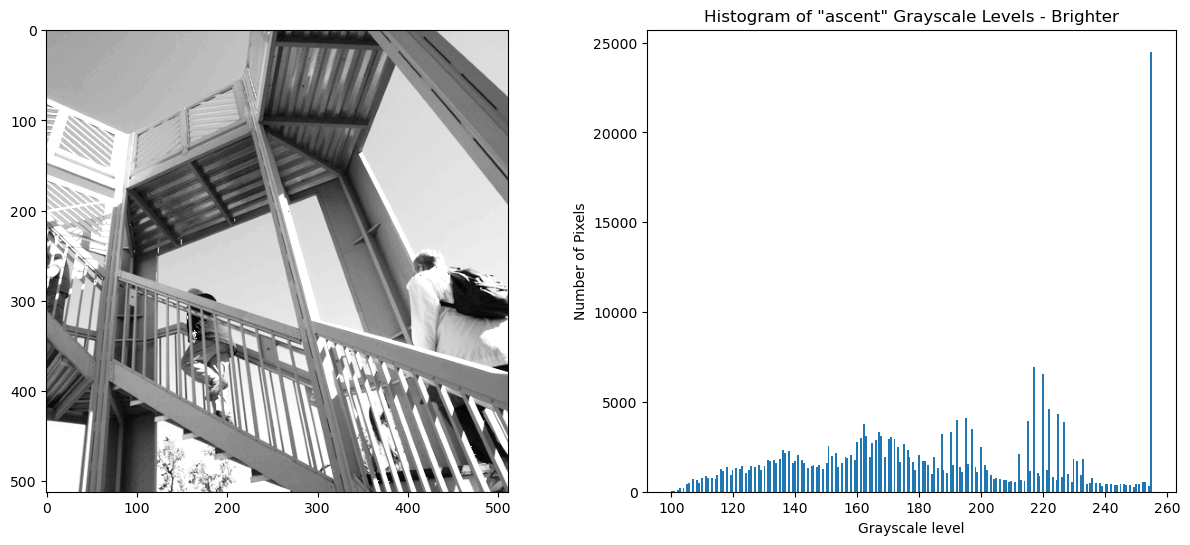

In [5]:
w,h=512,512 #w for width and h for height
ascent_bricon1=[[0 for x in range(w)] for y in range(h)]
ascent_bricon1 = np.array(ascent_bricon1)

for i in range(h):
    for ii in range(w):
        if ascent[i, ii] < 155: # piecewise function, brightening by 100 points section
            ascent_bricon1[i, ii] = ascent[i, ii] + 100
        else:
            ascent_bricon1[i, ii] = 255 # maximum brightness, flat section


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(ascent_bricon1, cmap = 'Greys_r')

ax[1].hist(ascent_bricon1.ravel(), bins = 255)
ax[1].set_title('Histogram of "ascent" Grayscale Levels - Brighter')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

Decreased Brightness

Text(0, 0.5, 'Number of Pixels')

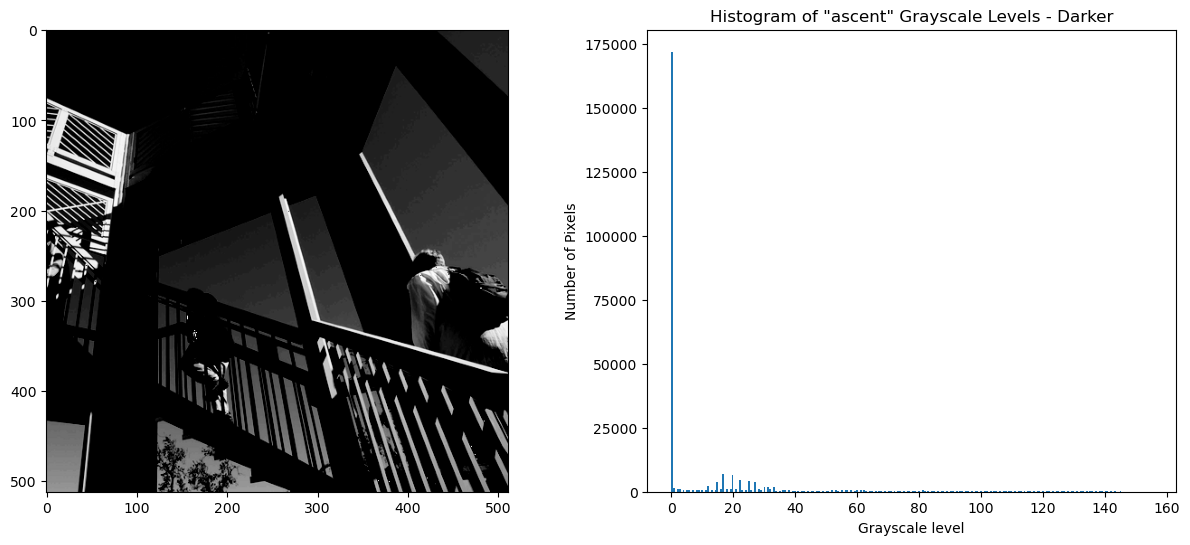

In [6]:
w,h=512,512 #w for width and h for height
ascent_bricon2=[[0 for x in range(w)] for y in range(h)]
ascent_bricon2 = np.array(ascent_bricon2)

for i in range(h):
    for ii in range(w):
        if ascent[i, ii] <= 100: # piecewise function, fully dark section
            ascent_bricon2[i, ii] = 0
        else:
            ascent_bricon2[i, ii] = ascent[i, ii] - 100 # falling, darkening by 100 points section

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(ascent_bricon2, cmap = 'Greys_r')

ax[1].hist(ascent_bricon2.ravel(), bins = 255)
ax[1].set_title('Histogram of "ascent" Grayscale Levels - Darker')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

Slightly increased contrast at DN 75

Text(0, 0.5, 'Number of Pixels')

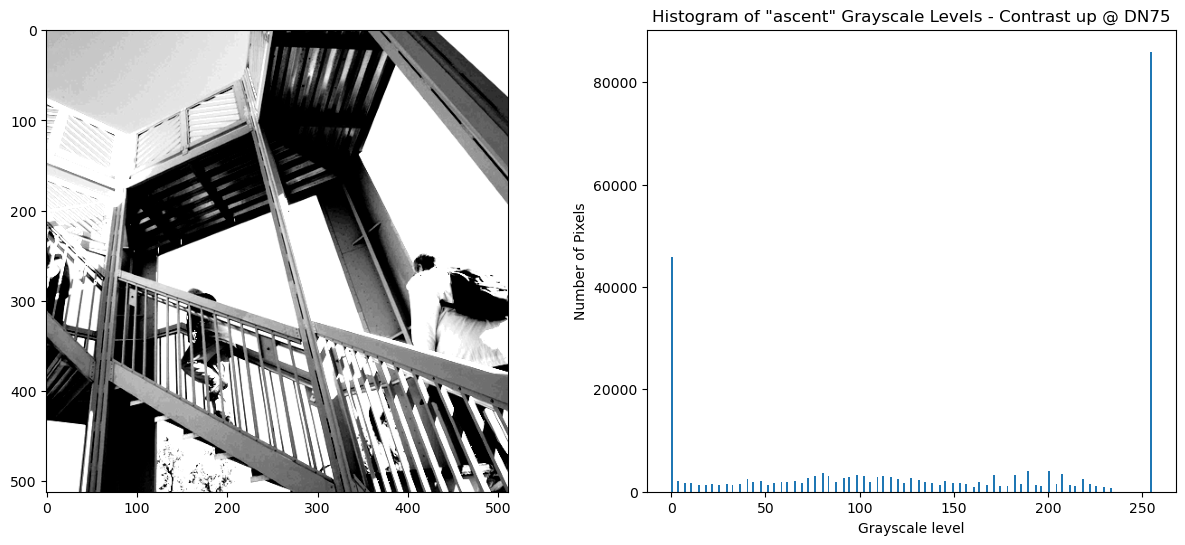

In [7]:
w,h=512,512 #w for width and h for height
ascent_bricon3=[[0 for x in range(w)] for y in range(h)]
ascent_bricon3 = np.array(ascent_bricon3)

for i in range(h):
    for ii in range(w):
        if ascent[i, ii] <= 40: # flat, black
            ascent_bricon3[i ,ii] = 0
        elif (ascent[i, ii] > 40) & (ascent[i, ii] < 105): # rising, contrast, centered on DN 75
            ascent_bricon3[i ,ii] = (ascent[i, ii]-40) * 255/70
        else: # flat, white
            ascent_bricon3[i, ii] = 255


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(ascent_bricon3, cmap = 'Greys_r')

ax[1].hist(ascent_bricon3.ravel(), bins = 255)
ax[1].set_title('Histogram of "ascent" Grayscale Levels - Contrast up @ DN75')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

Greatly increased contrast at DN 150

Text(0, 0.5, 'Number of Pixels')

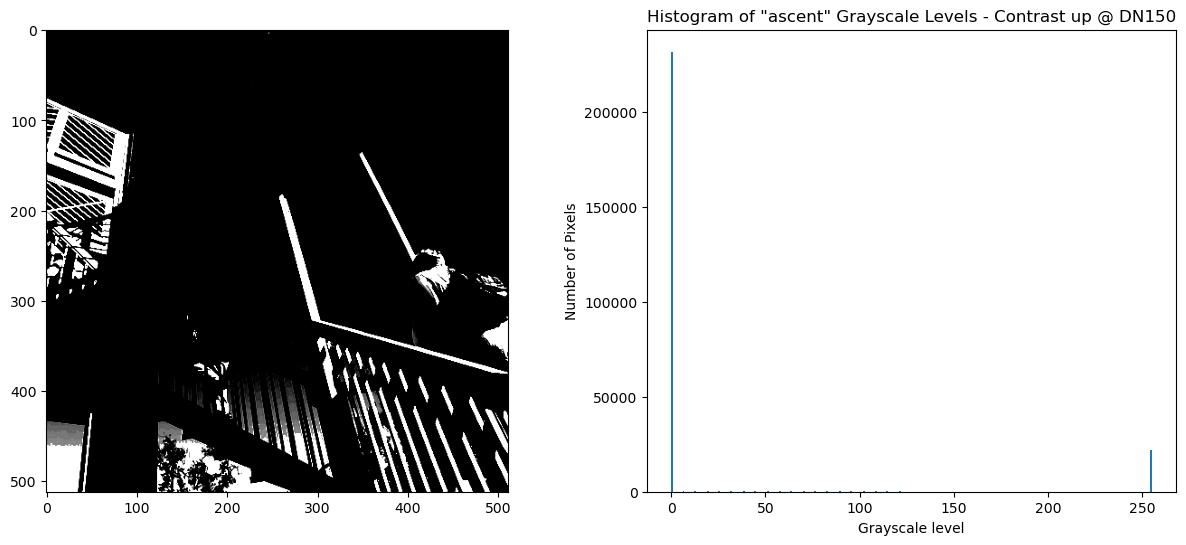

In [8]:
w,h=512,512 #w for width and h for height
ascent_bricon4=[[0 for x in range(w)] for y in range(h)]
ascent_bricon4 = np.array(ascent_bricon4)

for i in range(h):
    for ii in range(w):
        if ascent[i, ii] <= 140: # flat, black
            ascent_bricon4[i ,ii] = 0
        elif (ascent[i, ii] > 140) & (ascent[i, ii] < 160): # rising, contrast, centered on DN 150
            ascent_bricon4[i ,ii] = (ascent[i, ii]-140) * 255/40
        else: # flat, white
            ascent_bricon4[i, ii] = 255


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(ascent_bricon4, cmap = 'Greys_r')

ax[1].hist(ascent_bricon4.ravel(), bins = 255)
ax[1].set_title('Histogram of "ascent" Grayscale Levels - Contrast up @ DN150')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

Increased contrast at both DN 75 and 225

Text(0, 0.5, 'Number of Pixels')

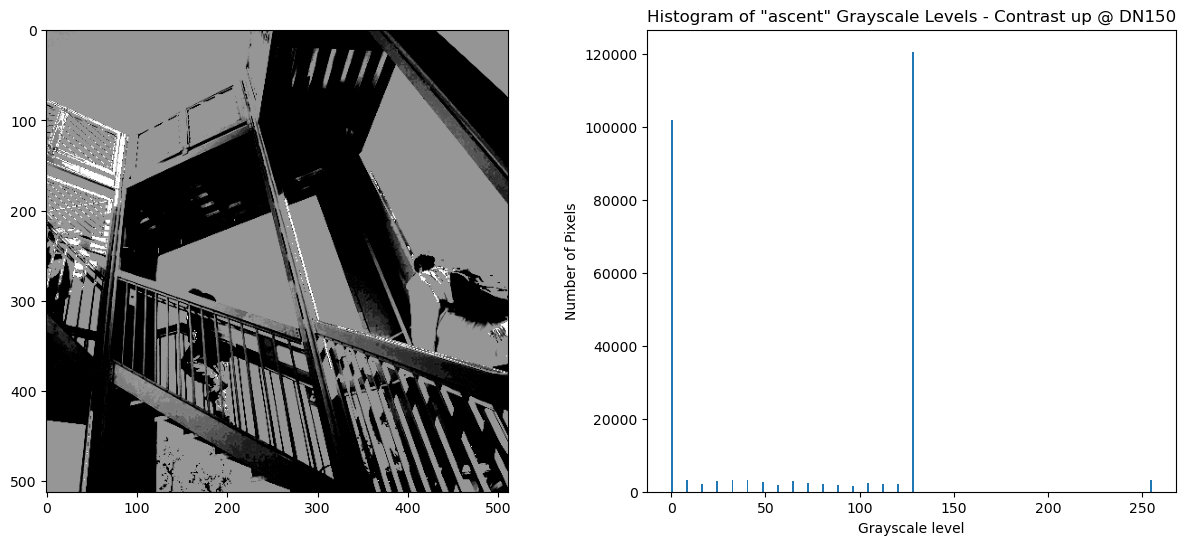

In [9]:
w,h=512,512 #w for width and h for height
ascent_bricon5=[[0 for x in range(w)] for y in range(h)]
ascent_bricon5 = np.array(ascent_bricon5)

for i in range(h):
    for ii in range(w):
        if ascent[i, ii] <= 67: # flat, black
            ascent_bricon5[i ,ii] = 0
        elif (ascent[i, ii] > 67) & (ascent[i, ii] < 83): # rising, contrast, centered on DN 75
            ascent_bricon5[i ,ii] = (ascent[i, ii]-67) * 128/16
        elif (ascent[i, ii] >= 83) & (ascent[i, ii] < 217):  # flat, grey
            ascent_bricon5[i ,ii] = 128
        elif (ascent[i, ii] > 217) & (ascent[i, ii] < 233): # rising, contrast, centered on DN 225
            ascent_bricon5[i ,ii] = (ascent[i, ii]-217) * 128/16
        else: # flat, white
            ascent_bricon5[i, ii] = 255


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(ascent_bricon5, cmap = 'Greys_r')

ax[1].hist(ascent_bricon5.ravel(), bins = 255)
ax[1].set_title('Histogram of "ascent" Grayscale Levels - Contrast up @ DN150')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

# Image Histograms

$$\frac{Area \: of \: object}{Area \: of \: whole \: picture} = \frac{Number \: of \: pixels \: in \: object}{Total \: pixels}$$

Part a)

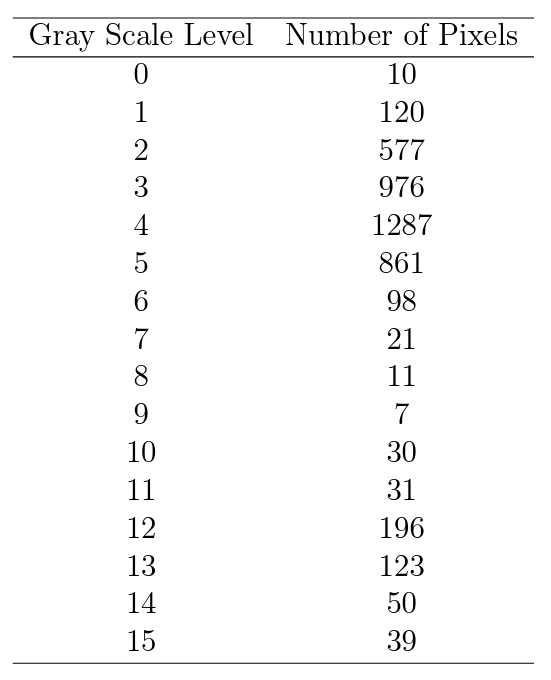

Sum of all pixels = 4437

Sum of brightest pixels (grayscale levels 12-15 at least) = 408

ratio = 0.091954

$ratio * 600cm^2 (whole \: image \: area) = 55cm^2$ = object area

diameter of object (assuming circular) $= 2\sqrt{\frac{object \: area}{\pi}} = 8.381cm$

object is probably a softball

Part b)

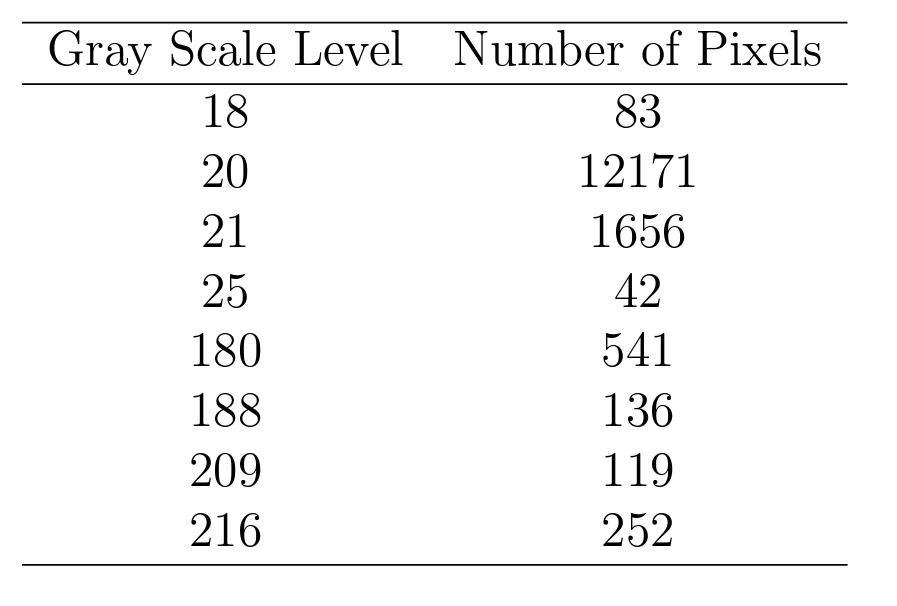

Looking at the description, the light coloured marbles are probably the pixels with 3-digit grayscale levels, and the black tablecloth covers the 18-25 grayscale levels.

total pixels = 15000 : image size = 15cm x 10cm

pixel dimensions = 150p x 100p

marble diameter = 13mm = 1.3cm = 13 pixels across

marble area in pixels $= \pi {\frac{13}{2}}^2 = 132.7 \approx 133 \: pixels$

Assuming each of the brighter grayscale levels is a different colour, fitting 133 into each pixel count would yield:

$541/133 \approx 4$ marbles in the 180 grayscale level

$136/133 \approx 1$ marble in the 188 grayscale level

$119/133 \approx 1$ marbles in the 209 grayscale level

$252/133 \approx 2$ marbles in the 213 grayscale level

For a total marble count of 8.

# Subtracting Images

In [15]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [25]:
img1=mpimg.imread("Data/Lab8 and WS 9 Images-20230302/clock1.png")
gray1 = np.floor(rgb2gray(img1)*8+0.5)
img2=mpimg.imread("Data/Lab8 and WS 9 Images-20230302/clock2.png")
gray2 = np.floor(rgb2gray(img2)*8+0.5)

In [26]:
gray1.shape

(530, 530)

In [29]:
w,h=530,530 #w for width and h for height
imgsub=[[0 for x in range(w)] for y in range(h)]
imgsub = np.array(imgsub)

for i in range(h):
    for ii in range(w):
        imgsub[i, ii] = (gray1[i, ii] - gray2[i, ii])+8

In [30]:
imgsub.min()

0

In [32]:
# this writes out the 2D list imgsub into a png file
mpimg.imsave("clocksub.png",imgsub)

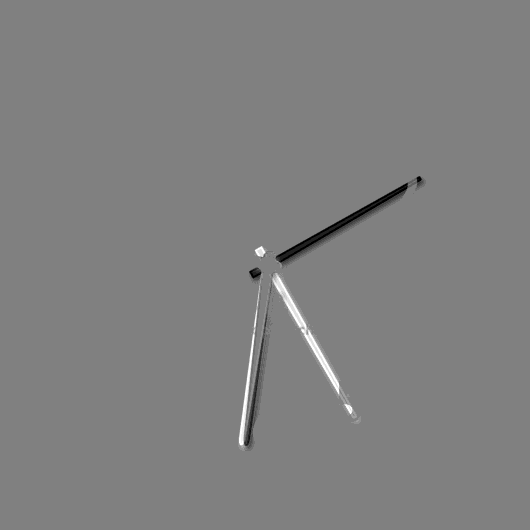

# Filtering Kernels

In [41]:
lopafilt = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
hipafilt = [[0,-1, 0], [-1, 4,-1], [0,-1, 0]]
vertsobel = [[-1,0,1], [-2,0,2], [-1, 0, 1]]
horisobel = [[-1,-2,-1], [0,0,0], [1, 2, 1]]
k = 3
edgenhance = [[-k/8,-k/8,-k/8], [-k/8,k+1,-k/8],[-k/8,-k/8,-k/8]]
shiftsub = [[0, 0, 0], [0,1,0],[0,0,-1]]

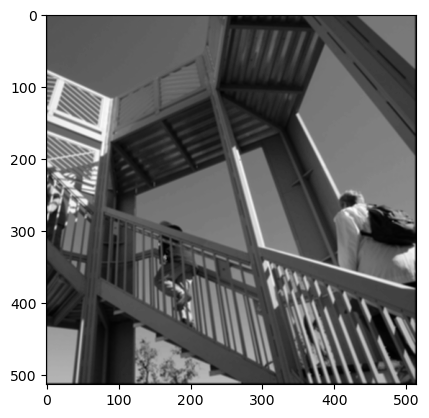

In [35]:
output=signal.convolve2d(lopafilt,ascent)
plt.imshow(output)
plt.show()

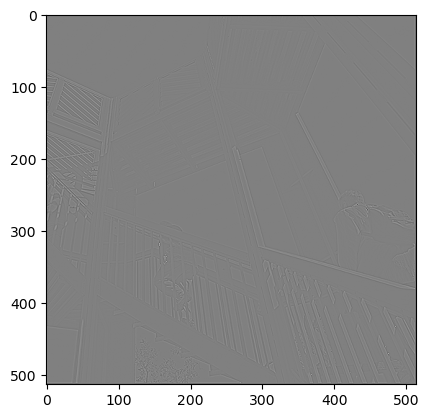

In [36]:
output=signal.convolve2d(hipafilt,ascent)
plt.imshow(output)
plt.show()

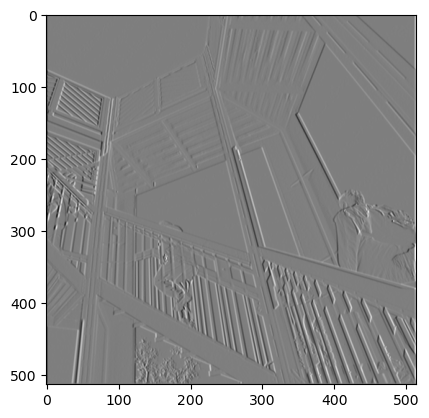

In [37]:
output=signal.convolve2d(vertsobel,ascent)
plt.imshow(output)
plt.show()

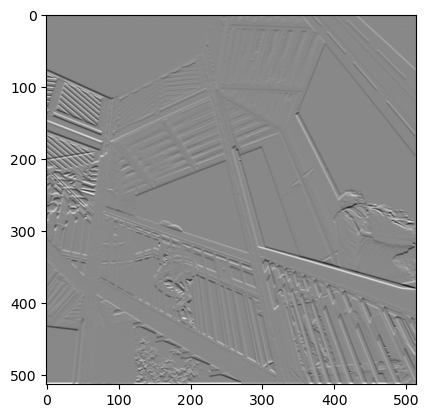

In [38]:
output=signal.convolve2d(horisobel,ascent)
plt.imshow(output)
plt.show()

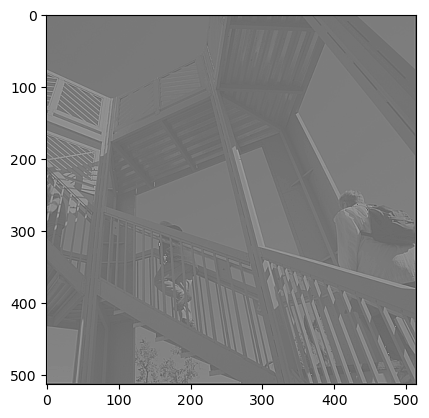

In [42]:
output=signal.convolve2d(edgenhance,ascent) # k = 3
plt.imshow(output)
plt.show()

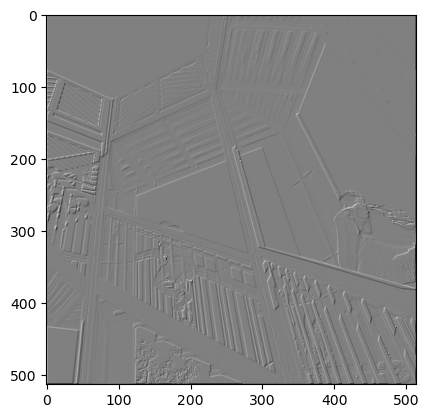

In [40]:
output=signal.convolve2d(shiftsub,ascent)
plt.imshow(output)
plt.show()